### Data Exploration

### Importing the required dependencies

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Load the dataset into a DataFrame
movies_df = pd.read_csv('movie_plots.csv')

In [36]:
# To display first 5 rows and to have a quick overview of the data structure, column names, and sample data.
movies_df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [37]:
# To display the number of rows and columns of the dataset
movies_df.shape

(34886, 8)

In [38]:
# To show the Metadata about the dataframe and to identify the columns with missing and incorrect datatypes 
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [39]:
# To count the missing values in each column to clean them
movies_df.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [40]:
# Generate descriptive statistics for all the columns and summarize the dataset with metrics like mean, standard deviation, etc.
movies_df.describe(include='all')

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
count,34886.000000,34886,34886,34886,33464,34886,34886,34886
unique,NaN,32432,24,12593,32182,2265,34070,33869
top,NaN,The Three Musketeers,American,Unknown,Tom and Jerry,unknown,https://en.wikipedia.org/wiki/Himitsu_Sentai_G...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou..."
freq,NaN,8,17377,1124,80,6083,5,6
mean,1981.314252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27.815174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Lists all the columns names of the dataset
movies_df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [42]:
# Count the number of occurrences of each unique value in the "Genre" column.
movies_df['Genre'].value_counts()
print(len(movies_df))

34886


In [43]:
# Check for duplicate rows
movies_df.duplicated().sum()  

# Remove duplicates
movies_df = movies_df.drop_duplicates()  
print(len(movies_df))

34886


### Exploratory Data Analysis

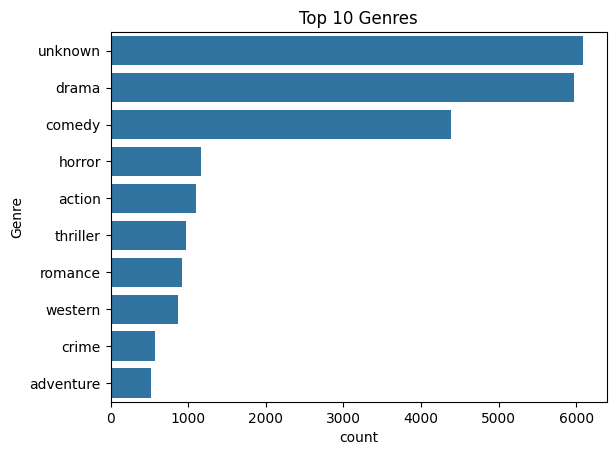

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for Genre
sns.countplot(y='Genre', data=movies_df, order=movies_df['Genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.show()

In [45]:
# Creating a dictionary of unique values and store it, to understand the variablity of data in each of the columns
unique_values = {}
for col in movies_df.columns:
    unique_values[col] = movies_df[col].nunique()

print(unique_values)

{'Release Year': 117, 'Title': 32432, 'Origin/Ethnicity': 24, 'Director': 12593, 'Cast': 32182, 'Genre': 2265, 'Wiki Page': 34070, 'Plot': 33869}


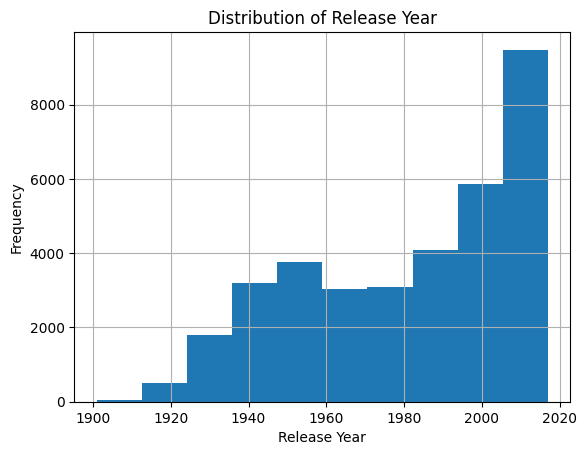

In [46]:
# Generate the histogram for all the numeric values and add title to each plot to specify colummn name
for col in movies_df.select_dtypes(include=['number']).columns:
    movies_df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [47]:
import os

# create folder if it doesn't exist
os.makedirs("Images", exist_ok=True)

Histogram saved as 'freqofreleaseyear.png' in './Images' directory.


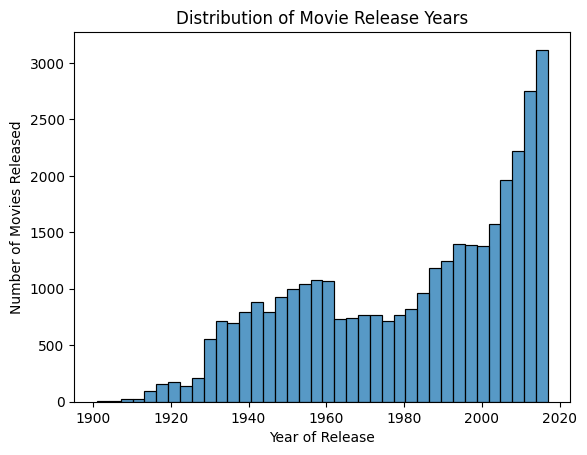

In [48]:
# Plot the histogram
sns.histplot(data=movies_df, x='Release Year')

# Add the updated title and labels
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')

# Save the figure
plt.savefig('./Images/freqofreleaseyear.png')

# Display message when the file is saved
print("Histogram saved as 'freqofreleaseyear.png' in './Images' directory.")

# Show the plot
plt.show()

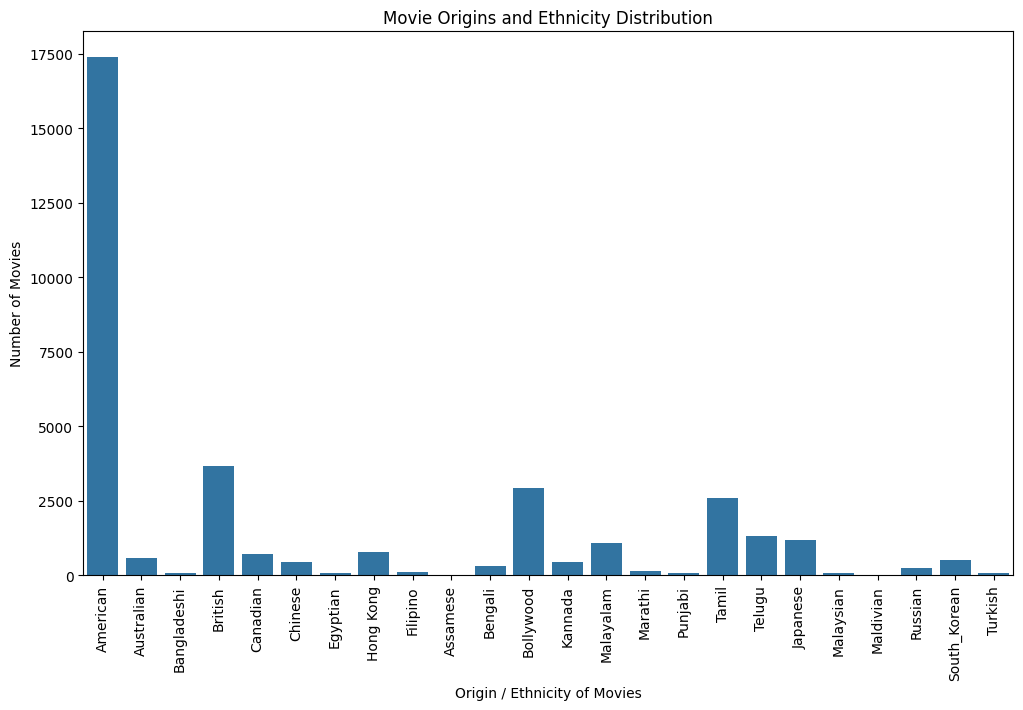

In [49]:
# Create the plot with specified figure size
fig, ax = plt.subplots(figsize=(12,8))

# Plotting the count distribution for Origin/Ethnicity
sns.countplot(x=movies_df['Origin/Ethnicity'])

# Adjust plot layout to prevent overlap
plt.gcf().subplots_adjust(bottom=0.2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add the updated title and axis labels
plt.title('Movie Origins and Ethnicity Distribution')
plt.xlabel('Origin / Ethnicity of Movies')
plt.ylabel('Number of Movies')

# Save the figure to a specified location
fig.savefig('./Images/FreqDistOrigin.png')

# Show the plot
plt.show()

In [50]:
# Filtering out the rows where "Genre" is marked unknown
movies_df = movies_df.loc[movies_df['Genre']!='unknown']

In [51]:
# Resets the index after filtering the dataset
movies_df.reset_index(drop = True, inplace = True)

In [52]:
# Counts the occurences of each genre
genres=pd.value_counts(movies_df.Genre)

#Print the unique genres
print('There are',len(genres), 'different Genres in the dataset:')
print('-'*50)
print(genres)

There are 2264 different Genres in the dataset:
--------------------------------------------------
Genre
drama                                                 5964
comedy                                                4379
horror                                                1167
action                                                1098
thriller                                               966
                                                      ... 
action / historical                                      1
fantasy, drama, children's, sci-fi, adventure, spy       1
drama, action, military, spy                             1
drama, kaiju, mecha, space opera, sci-fi, action         1
historical, drama, comedy-drama, romance, youth          1
Name: count, Length: 2264, dtype: int64


C:\Users\HARSHIT SHARMA\AppData\Local\Temp\ipykernel_5868\2071642345.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  genres=pd.value_counts(movies_df.Genre)


In [53]:
# Selects th etop 6 genres with the highest occurence
top_genres = pd.DataFrame(genres[:6]).reset_index()

# Create a new DataFrame with columns genres and number_of_movies
top_genres.columns = ['genres', 'number_of_movies']
top_genres

,genres,number_of_movies
0,drama,5964
1,comedy,4379
2,horror,1167
3,action,1098
4,thriller,966
5,romance,923


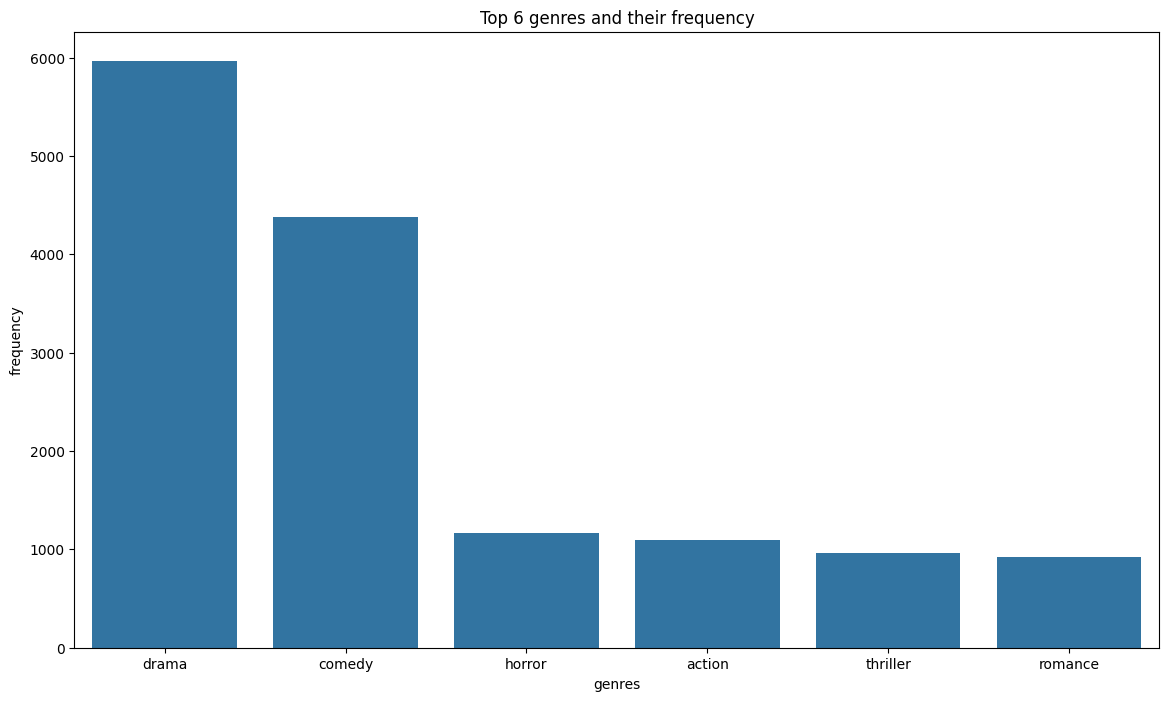

In [54]:
# Create a bar plot of the top genres using seaborn
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(x='genres', y='number_of_movies', data=top_genres, ax=ax)
plt.title('Top 6 genres and their frequency')
plt.xlabel('genres')
plt.ylabel('frequency')
fig.savefig('./Images/freqoftopgenres.png')

In [55]:
# A dictionary for genre labels
genre_labels = {
    'drama': 1,
    'comedy': 2,
    'horror': 3,
    'action': 4,
    'thriller': 5,
    'romance': 6
}

# Create a mapping dictionary, genre_labels, to assign numerical values to genres
movies_df['labels'] = movies_df['Genre'].map(genre_labels).fillna(0).astype(int)

In [56]:
# Displays the 3 random rows from the dataset
movies_df.sample(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,labels
80,1915,Birth of a Nation,American,D. W. Griffith,"Lillian Gish, Mae Marsh",epic,https://en.wikipedia.org/wiki/Birth_of_a_Nation,The film follows two juxtaposed families. One ...,0
2434,1939,Ambush,American,Kurt Neumann,"Lloyd Nolan, Gladys Swarthout",crime,https://en.wikipedia.org/wiki/Ambush_(1939_film),Charlie Hartman is part of a gang bossed by a ...,0
8455,1970,Joe,American,John G. Avildsen,"Peter Boyle, Susan Sarandon",drama,https://en.wikipedia.org/wiki/Joe_(1970_film),"Advertising executive Bill Compton, his wife J...",1


In [57]:
# Count occurrences of each unique value in the labels column (derived from genre_labels)
movies_df['labels'].value_counts()

labels
0    14306
1     5964
2     4379
3     1167
4     1098
5      966
6      923
Name: count, dtype: int64

In [58]:
# Filter out rows where labels is 0 and reset the index after filtering
df = movies_df.query('labels != 0').reset_index(drop=True)

In [59]:
# Displays the first 5 rows of the dataset
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,labels
0,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...,2
1,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...,2
2,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...,2
3,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...,1
4,1908,The Black Viper,American,D. W. Griffith,D. W. Griffith,drama,https://en.wikipedia.org/wiki/The_Black_Viper,A thug accosts a girl as she leaves her workpl...,1


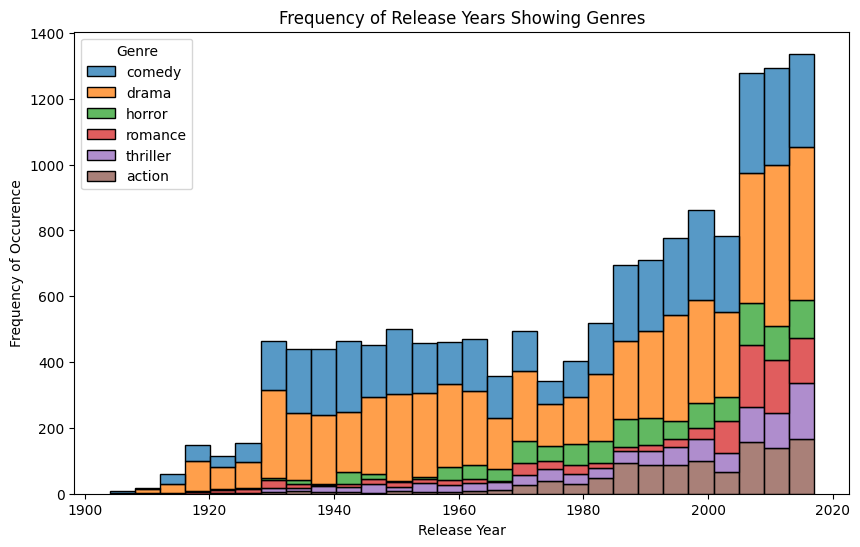

In [60]:
# Group the data by Release Year & Genre to count occurences
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = 'Release Year', hue = 'Genre', data = df, multiple = 'stack')
plt.title('Frequency of Release Years Showing Genres')
plt.xlabel('Release Year')
plt.ylabel('Frequency of Occurence')

# Save the image
fig.savefig('./images/freqofreleaseyearandgenres.png');

In [61]:
# Create an empty list to store the genre labels
assigned_label = []

# Loop over unique genres and labels and add them to the list
for genre, label in zip(df['Genre'].unique(), df['labels'].unique()):
    assigned_label.append([genre, label])

# Convert the list to a DataFrame
assigned_label_df = pd.DataFrame(assigned_label, columns=['genres', 'labels'])

# Sort the DataFrame by 'labels' using a for loop
assigned_label_df = assigned_label_df.iloc[sorted(range(len(assigned_label_df)), key=lambda x: assigned_label_df.iloc[x]['labels'])]

# Merge with 'top_genres' using a for loop to find matching genres
result = []
for _, row in assigned_label_df.iterrows():
    for _, top_row in top_genres.iterrows():
        if row['genres'] == top_row['genres']:
            result.append({**row.to_dict(), **top_row.to_dict()})

# Convert the result list back into a DataFrame
result_df = pd.DataFrame(result)
result_df

,genres,labels,number_of_movies
0,drama,1,5964
1,comedy,2,4379
2,horror,3,1167
3,action,4,1098
4,thriller,5,966
5,romance,6,923


In [62]:
# Removes the unnecessary columns from the DataFrame.
df.drop(columns = ['Release Year', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis = 1, inplace = True)

In [63]:
# Displays the first 2 rows of the modified DataFrame
df.head(2)

,Title,Genre,Plot,labels
0,The Suburbanite,comedy,The film is about a family who move to the sub...,2
1,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...,2


In [64]:
# To access the plot description of the 5th row of the dataset
df['Plot'][5]

"A young couple decides to elope after being caught in the midst of a romantic moment by the woman's angry father. They make plans to leave, but a thief discovers their plans and hides in their trunk and waits for the right moment to steal their belongings."

In [65]:
# The function counts the total number of words in the dataset
def count_words(text_data):
    total_words = 0
    index = 0
    while index < len(text_data):
        sentence = text_data.iloc[index]
        word_list = sentence.split(' ')
        total_words += len(word_list)
        index += 1
    return total_words

word_count = count_words(df['Plot'])

In [66]:
# The function counts the total number of unique words in the dataset
def count_unique_words(text_data):
    unique_words = set()
    index = 0
    while index < len(text_data):
        sentence = text_data.iloc[index]
        words = sentence.split(' ')
        for word in words:
            unique_words.add(word)
        index += 1
    return len(unique_words)

unique_word_count = count_unique_words(df['Plot'])

### Using the Regex Pattern for text cleaning and creating the stopwords list.

In [67]:
import re
import string
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import WordNetLemmatizer

# Set of regex patterns for common text cleaning tasks
patterns = {
    "whats": re.compile(r"what's"),
    "apos_s": re.compile(r"\'s"),
    "apos_ve": re.compile(r"\'ve"),
    "cant": re.compile(r"can't"),
    "nt": re.compile(r"n't"),
    "apos_re": re.compile(r"\'re"),
    "apos_d": re.compile(r"\'d"),
    "apos_ll": re.compile(r"\'ll"),
    "apos_scuse": re.compile(r"\'scuse"),
    "non_word": re.compile(r'\W'),
    "extra_space": re.compile(r'\s+'),
    "digits": re.compile(r'\d+'),
}

# Creates a set of words and symbols to ignore during text processing
stopwords_list = set(STOP_WORDS)
stopwords_list.update(string.punctuation, ['one', 'two', 'go', 'goes', 'get', 'also', 'however', 'tells'])

#Initializing a lemmatizer to convert words into their base form
lemmatizer = WordNetLemmatizer()

# Fucntion to clean the text
def clean_text(text):
    text = text.lower()
    text = patterns["whats"].sub("what is ", text)
    text = patterns["apos_s"].sub(" ", text)
    text = patterns["apos_ve"].sub(" have ", text)
    text = patterns["cant"].sub("can not ", text)
    text = patterns["nt"].sub(" not ", text)
    text = patterns["apos_re"].sub(" are ", text)
    text = patterns["apos_d"].sub(" would ", text)
    text = patterns["apos_ll"].sub(" will ", text)
    text = patterns["apos_scuse"].sub(" excuse ", text)
    text = patterns["non_word"].sub(" ", text)
    text = patterns["extra_space"].sub(" ", text)
    text = patterns["digits"].sub(" ", text)
    text = text.strip()

    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords_list]
    return " ".join(filtered_tokens)

# Function for batch processing
def process_in_batches(df, column, func, batch_size=100):
    results = []
    for start in range(0, len(df), batch_size):
        end = start + batch_size
        batch = df[column][start:end].map(func)
        results.extend(batch)
    return results

In [69]:
import nltk

# download common datasets used for NLP
nltk.download('punkt')        # for word_tokenize
nltk.download('stopwords')    # for stopwords
nltk.download('wordnet')      # for lemmatization
nltk.download('omw-1.4')      # for WordNet languages


[nltk_data] Downloading package punkt to C:\Users\HARSHIT
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HARSHIT
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HARSHIT
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\HARSHIT
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [71]:
# # Creates a deep copy of the filtered DataFrame (df) for safe modification
# new_df = df.copy(deep=True)

# #Process the Plot column in batches using process_in_batches and clean_text
# new_df['Plot'] = process_in_batches(new_df, 'Plot', clean_text, batch_size=100)

# print(new_df['Plot'][5])
import re

def clean_text_python(text):
    """
    Basic text cleaning without NLTK or SpaCy:
    - Lowercase
    - Remove punctuation and numbers
    - Remove extra spaces
    """
    text = str(text).lower()                          # lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()         # remove extra spaces
    return text
def process_in_batches(df, column, func, batch_size=100):
    """
    Apply a cleaning function to a DataFrame column in batches.
    """
    for start in range(0, len(df), batch_size):
        end = start + batch_size
        df.loc[start:end-1, column] = df.loc[start:end-1, column].apply(func)
    return df[column]

# Make a deep copy
new_df = df.copy(deep=True)

# Clean the 'Plot' column without NLTK or SpaCy
new_df['Plot'] = process_in_batches(new_df, 'Plot', clean_text_python, batch_size=100)

# Example output
print(new_df['Plot'][5])


a young couple decides to elope after being caught in the midst of a romantic moment by the womans angry father they make plans to leave but a thief discovers their plans and hides in their trunk and waits for the right moment to steal their belongings


In [72]:
# Counts the total words in the cleaned Plot column using the previously defined count_words function
clean_word_count = count_words(new_df['Plot'])

In [73]:
# Counts the unique words in the cleaned Plot column using the count_unique_words function
clean_unique_word_count = count_unique_words(new_df['Plot'])

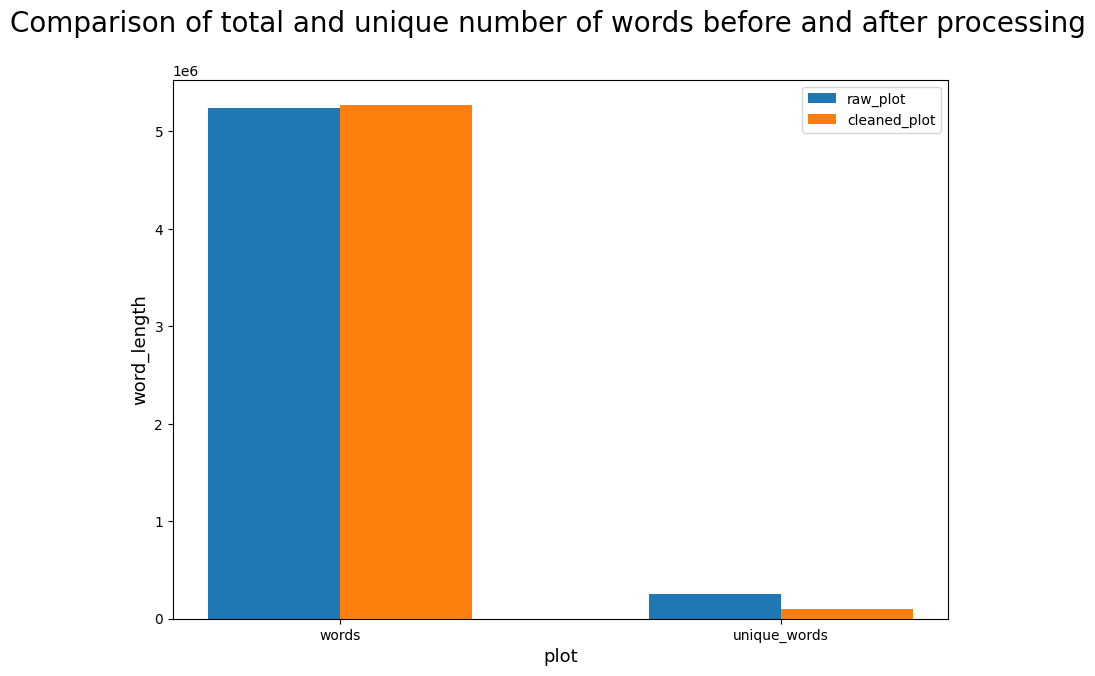

In [74]:
# Creates a list, plot_length, to compare raw vs cleaned text
plot_length = [[word_count, clean_word_count], [unique_word_count, clean_unique_word_count]]

# Converts the list into a DataFrame, length_df
length_df = pd.DataFrame(plot_length, columns = ['num_of_words', 'num_of_unique_words'])
length_df['index'] = ['raw_plot', 'cleaned_plot']

y1 = length_df['num_of_words']
y2 = length_df['num_of_unique_words']

plt.figure(figsize=(10,7))
ind = np.arange(2)

width = 0.3       

# Plotting
plt.bar(ind, y1, width, label='raw_plot')
plt.bar(ind + width, y2, width, label='cleaned_plot')

plt.xlabel('plot', size = 13)
plt.ylabel('word_length', size = 13)
plt.suptitle('Comparison of total and unique number of words before and after processing', size = 20)
plt.xticks(ind + width / 2, ('words', 'unique_words'))
plt.legend(loc='best')
plt.show()

# Save the plot as an image
fig.savefig('./Images/totalvsuniquewords.png')

In [75]:
# Displays the DataFrame by summarizing the word counts for raw vs cleaned plots
length_df

,num_of_words,num_of_unique_words,index
0,5240143,5267087,raw_plot
1,253147,101744,cleaned_plot


In [76]:
# Saving Cleaned Dataframe to a CSV file
new_df.to_csv('cleaned_movie_plots.csv', index=False)